In [1]:
import torch

In [2]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [3]:
resnet = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [4]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision import transforms
transform = transforms.Compose([  
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])


In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
%cd '/content/gdrive/MyDrive/Pytorch'
!ls

/content/gdrive/MyDrive/Pytorch
cat.jpg  finetuning.ipynb  torchvision.ipynb


In [17]:
from PIL import Image
img = Image.open("cat.jpg")

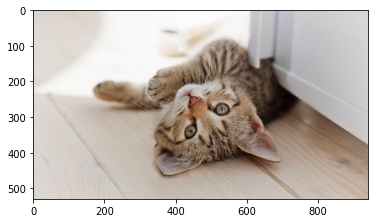

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [19]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [20]:
resnet.eval()
out = resnet(batch_t)

In [21]:
out

tensor([[-3.6281e+00, -1.2228e+00, -2.2320e+00, -1.3751e+00, -1.1213e+00,
          3.7083e-01, -1.2075e+00,  8.2494e-01,  1.3344e+00, -5.0851e-01,
         -3.9405e-01, -3.1705e+00,  4.5641e+00, -5.5635e-01, -7.5181e-01,
          1.1715e+00, -6.6589e-01,  2.0015e-02, -1.5048e+00, -2.9604e+00,
         -1.9290e-01,  6.4066e-01, -8.0080e-01,  6.0290e-01,  2.4681e+00,
         -3.6124e+00, -4.3763e+00, -3.1729e+00, -2.4600e+00, -2.3801e+00,
          1.7376e-01, -1.8592e+00, -1.2075e+00, -1.7469e+00,  2.5675e-01,
         -1.0824e+00,  2.6201e-01,  1.7488e-02,  2.1857e+00,  5.7453e-01,
         -2.1454e-01,  2.8533e+00, -5.2891e-01,  8.5325e-01, -2.0487e-01,
         -1.7079e+00,  3.2773e-01, -9.2088e-01, -2.4493e+00, -2.8361e+00,
         -2.0330e+00,  6.0522e-01, -1.7495e+00, -1.8233e+00, -8.1794e-01,
         -3.2313e+00, -3.8017e-01, -3.3399e+00, -1.5988e+00,  2.2557e-01,
         -1.0229e-01,  1.8499e-01, -3.3301e-01, -2.2156e+00, -1.7932e+00,
         -2.4114e+00,  1.6648e+00,  1.

In [22]:
out.argmax()

tensor(281)